# Star Wars Survey Analysis

This project explores the data from a survey about Star Wars run by FiveThirtyEight using SurveyMonkey. The original dataset is available [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
star_wars = star_wars.rename(columns={
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
    "Unnamed: 16": "Luke Skywalker",
    "Unnamed: 17": "Princess Leia Organa",
    "Unnamed: 18": "Anakin Skywalker",
    "Unnamed: 19": "Obi Wan Kenobi",
    "Unnamed: 20": "Emperor Palpatine",
    "Unnamed: 21": "Darth Vader",
    "Unnamed: 22": "Lando Calrissian",
    "Unnamed: 23": "Boba Fett",
    "Unnamed: 24": "C-3P0",
    "Unnamed: 25": "R2 D2",
    "Unnamed: 26": "Jar Jar Binks",
    "Unnamed: 27": "Padme Amidala",
    "Unnamed: 28": "Yoda",
})

In [29]:
star_wars[star_wars.columns[15:30]].head(10)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,I don't understand this question
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I don't understand this question
4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0,I don't understand this question
5,2.0,1.0,1.0,-1.0,2.0,-2.0,1.0,0.0,2.0,1.0,1.0,-2.0,1.0,1.0,Greedo
6,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,Han
7,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,-1.0,1.0,2.0,Han
8,2.0,1.0,2.0,0.0,2.0,-2.0,-1.0,0.0,1.0,1.0,1.0,-2.0,-1.0,2.0,Han
9,2.0,-1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,-2.0,-1.0,1.0,Han
10,0.0,2.0,2.0,2.0,2.0,-1.0,2.0,-1.0,-1.0,2.0,2.0,2.0,-1.0,2.0,I don't understand this question


In [5]:
# remove null RespondentIDs
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [6]:
# change Yes and No to booleans
true_false = { "Yes": True, "No": False }
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = \
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(true_false)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = \
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(true_false)

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
import numpy as np

# convert columns relating to what movies the person saw so the columns make more sense
true_false_movies = { 
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith" : True,
    "Star Wars: Episode IV  A New Hope" : True,
    "Star Wars: Episode V The Empire Strikes Back" : True,
    "Star Wars: Episode VI Return of the Jedi" : True,
    np.NaN: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(true_false_movies)
    

In [10]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts()

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [11]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

In [12]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [13]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [14]:
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': "ranking_1",
    'Unnamed: 10': "ranking_2",
    'Unnamed: 11': "ranking_3",
    'Unnamed: 12': "ranking_4",
    'Unnamed: 13': "ranking_5",
    'Unnamed: 14': "ranking_6"
})

In [15]:
rankings = star_wars[star_wars.columns[9:15]].mean()

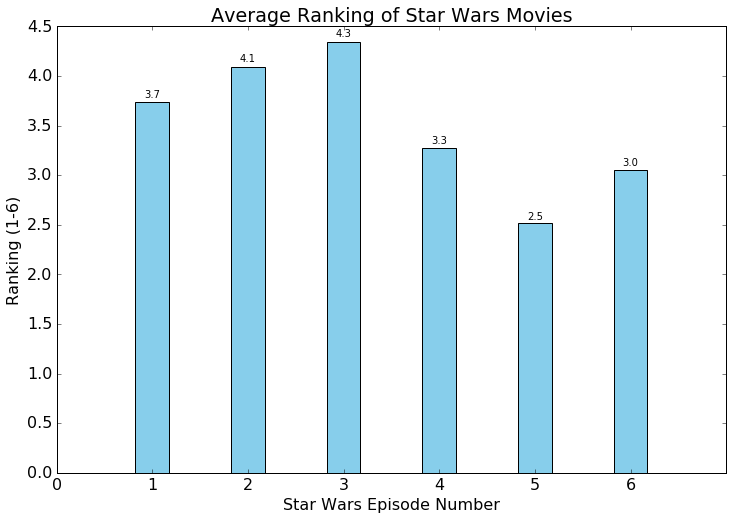

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
ind = np.arange(len(rankings))  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind - width/2, rankings, width,
                color='SkyBlue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ranking (1-6)')
ax.set_xlabel('Star Wars Episode Number')
ax.set_title('Average Ranking of Star Wars Movies')
ax.set_xticklabels(range(0,7))

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{:.2}'.format(height), ha=ha[xpos], va='bottom')
        
autolabel(rects1)
plt.rcParams.update({'font.size': 16})

So far, we've cleaned up the data and made a bar chart of which movies were most liked. Lower numbers are more popular (1 is most-liked movie). It looks like the original episodes (4-6) were more popular than the newer ones. The Empire Strikes Back was the clear favorite, and apparently the movies went downhill from there.

In [17]:
seen = star_wars.loc[:,'seen_1':'seen_6'].sum()

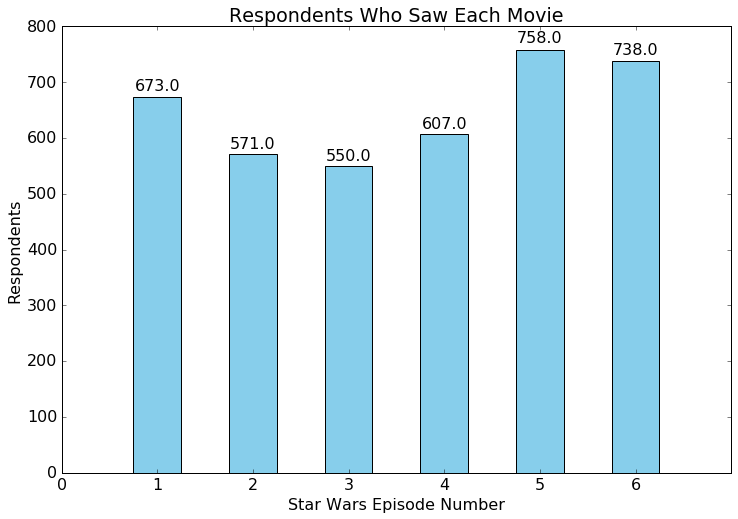

In [94]:
ind = np.arange(len(seen))  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind - width/2, seen, width,
                color='SkyBlue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Respondents')
ax.set_xlabel('Star Wars Episode Number')
ax.set_title('Respondents Who Saw Each Movie')
ax.set_xticklabels(range(0,7))

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')
        
autolabel(rects1)
plt.rcParams.update({'font.size': 16})

The most popular movies were seen by the most respondents, and the number of watchers drops off with each new movie. This makes sense: the worse the movies got, the fewer people bothered to watch them.

In [19]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [20]:
rankings_male = males[males.columns[9:15]].mean()
rankings_female = females[females.columns[9:15]].mean()

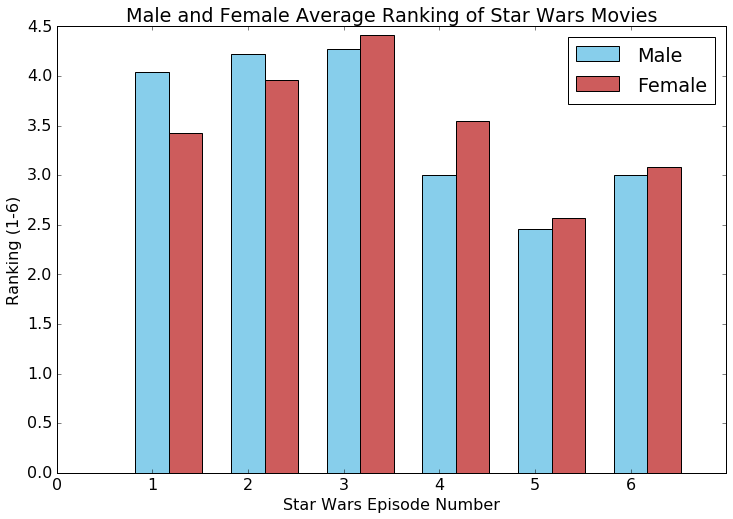

In [90]:
ind = np.arange(len(rankings))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind - width/2, rankings_male, width,
                color='SkyBlue', label='Male')
rects2 = ax.bar(ind + width/2, rankings_female, width,
                color='IndianRed', label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ranking (1-6)')
ax.set_xlabel('Star Wars Episode Number')
ax.set_title('Male and Female Average Ranking of Star Wars Movies')
ax.set_xticklabels(range(0,7))
ax.legend()
plt.rcParams.update({'font.size': 16})

In [22]:
seen_male = males.loc[:,'seen_1':'seen_6'].sum()
seen_female = females.loc[:,'seen_1':'seen_6'].sum()

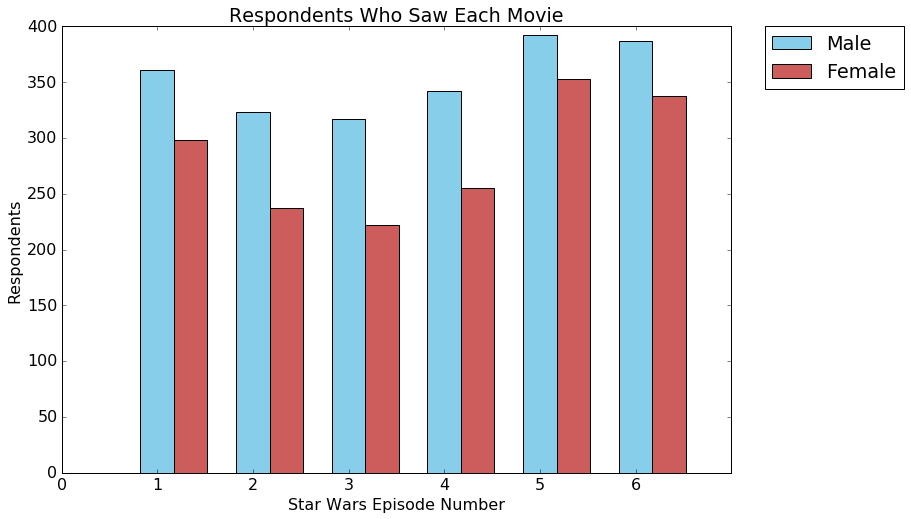

In [91]:
ind = np.arange(len(seen_male))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind - width/2, seen_male, width,
                color='SkyBlue', label='Male')
rects2 = ax.bar(ind + width/2, seen_female, width,
                color='IndianRed', label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Respondents')
ax.set_xlabel('Star Wars Episode Number')
ax.set_title('Respondents Who Saw Each Movie')
ax.set_xticklabels(range(0,7))
ax.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams.update({'font.size': 16})

In this survey, males and females agreed on which movies were better. Notably, fewer females than have seen each movie. Considering there were more female respondents than male respondents to the survey, this is particularly interesting.

In [24]:
print("Males: " + str(males.size) + ", Females: " + str(females.size))

Males: 18886, Females: 20862


In [26]:
star_wars['Han Solo'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

In [28]:
numerical = {
    'Very favorably': 2.0,
    'Somewhat favorably': 1.0,
    'Neither favorably nor unfavorably (neutral)': 0.0,
    'Somewhat unfavorably': -1.0,
    'Very unfavorably': -2.0,
    'Unfamiliar (N/A)': np.NaN,
}

for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].map(numerical)
  

In [39]:
characters = star_wars.loc[:,'Han Solo':'Yoda'].sum()

In [40]:
characters.sort_values(ascending=False, inplace=True)
print(characters)

Han Solo                1361.0
Yoda                    1330.0
Obi Wan Kenobi          1319.0
Luke Skywalker          1304.0
R2 D2                   1287.0
Princess Leia Organa    1280.0
C-3P0                   1140.0
Anakin Skywalker         598.0
Lando Calrissian         428.0
Padme Amidala            393.0
Darth Vader              391.0
Boba Fett                243.0
Emperor Palpatine         47.0
Jar Jar Binks           -156.0
dtype: float64


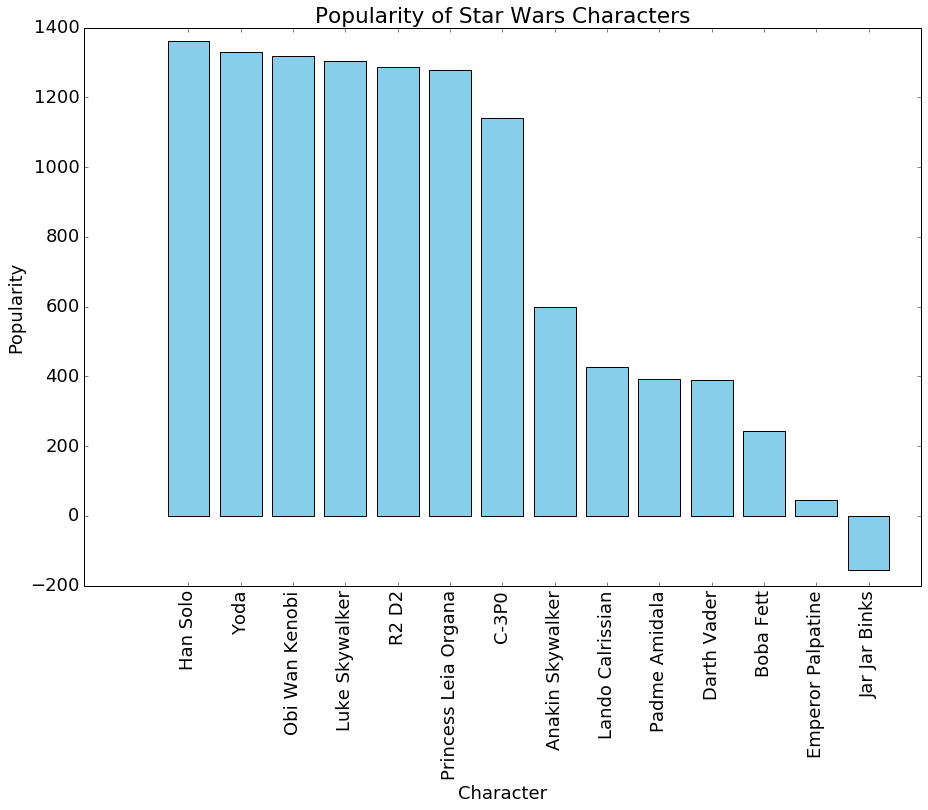

In [88]:
ind = np.arange(len(characters))  # the x locations for the groups
width = 0.8  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(ind - width/2.0, characters, width,
                color='SkyBlue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Popularity')
ax.set_xlabel('Character')
ax.set_title('Popularity of Star Wars Characters')
ax.set_xticks(ind)
ax.set_xticklabels(characters.index, rotation = 90)
plt.rcParams.update({'font.size': 18})

Clearly, characters from the classic films are much better liked, with the exception of Darth Vader (the original villan). Han Solo is the most popular, and Jar Jar Binks is the least popular. I find it amusing that Luke barely edges out R2-D2. 

In [61]:
raw_scores = star_wars.loc[:,'Han Solo':'Yoda']
positive = raw_scores > 0
negative = raw_scores < 0
pos = positive.sum()
neg = negative.sum()

In [102]:
series_list = [pos, neg]
sentiment = pd.concat(series_list, axis=1)
sentiment = sentiment.rename(columns={
    "0": "like",
    "1": "dislike",
})
sentiment['sum'] = pos + neg
sentiment['percent_like'] = pos / sentiment['sum'] * 100
sentiment['agreement'] = abs(50-sentiment['percent_like'])
sentiment.sort_values('agreement', ascending=False,inplace=True)


                        0    1  sum  percent_like  agreement
Han Solo              761    9  770     98.831169  48.831169
Obi Wan Kenobi        750   15  765     98.039216  48.039216
Luke Skywalker        771   16  787     97.966963  47.966963
Yoda                  749   16  765     97.908497  47.908497
R2 D2                 747   16  763     97.903014  47.903014
Princess Leia Organa  757   18  775     97.677419  47.677419
C-3P0                 703   30  733     95.907231  45.907231
Lando Calrissian      365   71  436     83.715596  33.715596
Anakin Skywalker      514  122  636     80.817610  30.817610
Padme Amidala         351   92  443     79.232506  29.232506
Boba Fett             291  141  432     67.361111  17.361111
Darth Vader           481  251  732     65.710383  15.710383
Emperor Palpatine     253  192  445     56.853933   6.853933
Jar Jar Binks         242  306  548     44.160584   5.839416


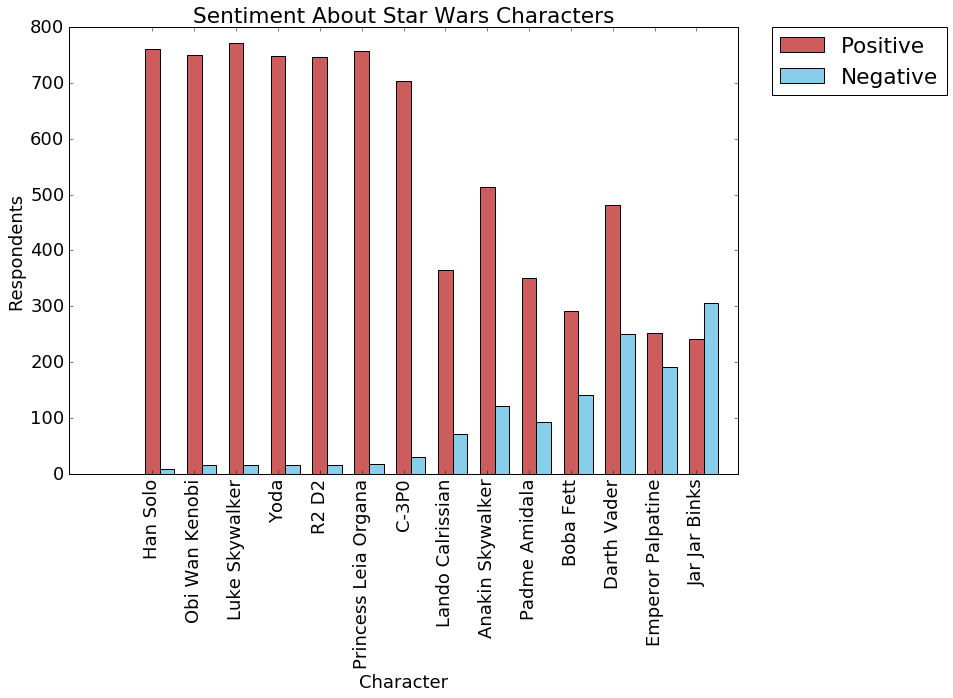

In [103]:
ind = np.arange(len(pos))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind - width/2, sentiment[0], width,
                color='IndianRed', label='Positive')
rects2 = ax.bar(ind + width/2, sentiment[1], width,
                color='SkyBlue', label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Respondents')
ax.set_xlabel('Character')
ax.set_title('Sentiment About Star Wars Characters')
ax.set_xticks(ind)
ax.set_xticklabels(sentiment.index, rotation = 90)
plt.rcParams.update({'font.size': 18})
ax.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
print(sentiment)

From both numerical and graphical analysis, Jar Jar Binks is the most controversial character, followed by Emperor Palpatine. Darth Vader and Boba Fett are also somewhat controversial.